Atividade 3: Bernardo Gontijo Vaz Guimarães

In [109]:
# Primeiramente vamos importar as bibliotecas usadas neste estudo de caso como segue.
import numpy as np #biblioteca com recursos para álgebra linear
import pandas as pd # processamento dos dados, carga de arquivo CSV e de I/O
import json
from sklearn import * 
import sklearn.model_selection as model_selection
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
#from collections import Counter
#from sklearn.cross_validation import train_test_split

In [13]:
nome_colunas = [
    "having_IP_Address",
    "URL_Length",
    "Shortining_Service",
    "having_At_Symbol",
    "double_slash_redirecting",
    "Prefix_Suffix",
    "having_Sub_Domain",
    "SSLfinal_State",
    "Domain_registeration_length",
    "Favicon",
    "port",
    "HTTPS_token",
    "Request_URL",
    "URL_of_Anchor",
    "Links_in_tags",
    "SFH",
    "Submitting_to_email",
    "Abnormal_URL",
    "Redirect",
    "on_mouseover",
    "RightClick",
    "popUpWidnow",
    "Iframe",
    "age_of_domain",
    "DNSRecord",
    "web_traffic",
    "Page_Rank",
    "Google_Index",
    "Links_pointing_to_page",
    "Statistical_report",
    "Result"
]

In [14]:
# Primeiro, vamos testar o carregamento do arquivo CSV.
# Não vamos usar com detalhes a biblioteca pandas neste caso, mas esse trecho de código ajuda a entender o arquivo com o conjunto de dados.
df = pd.read_csv(
    'phishing.csv',
names = nome_colunas)
df.info() #apresenta os metadados do arquivo csv
df.tail(10)
#df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
11045,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,0,-1,1,0,1,1
11046,-1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,0,-1,1,1,1,1
11047,-1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11048,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,0,-1,1,0,1,1
11049,-1,-1,1,1,-1,-1,1,-1,1,1,...,1,1,-1,1,1,-1,1,1,1,-1
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1
11054,-1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


In [22]:
for column in df:
    print(column,df[column].value_counts())

having_IP_Address having_IP_Address
 1    7262
-1    3793
Name: count, dtype: int64
URL_Length URL_Length
-1    8960
 1    1960
 0     135
Name: count, dtype: int64
Shortining_Service Shortining_Service
 1    9611
-1    1444
Name: count, dtype: int64
having_At_Symbol having_At_Symbol
 1    9400
-1    1655
Name: count, dtype: int64
double_slash_redirecting double_slash_redirecting
 1    9626
-1    1429
Name: count, dtype: int64
Prefix_Suffix Prefix_Suffix
-1    9590
 1    1465
Name: count, dtype: int64
having_Sub_Domain having_Sub_Domain
 1    4070
 0    3622
-1    3363
Name: count, dtype: int64
SSLfinal_State SSLfinal_State
 1    6331
-1    3557
 0    1167
Name: count, dtype: int64
Domain_registeration_length Domain_registeration_length
-1    7389
 1    3666
Name: count, dtype: int64
Favicon Favicon
 1    9002
-1    2053
Name: count, dtype: int64
port port
 1    9553
-1    1502
Name: count, dtype: int64
HTTPS_token HTTPS_token
 1    9259
-1    1796
Name: count, dtype: int64
Request_URL

In [3]:
# Vamos agora carregar o dataset que iremos utilizar na variável np.
training_data = np.genfromtxt('phishing.csv', delimiter=',', dtype=np.int32)
print(training_data) #para ver os dados na variável.

[[-1  1  1 ...  1 -1 -1]
 [ 1  1  1 ...  1  1 -1]
 [ 1  0  1 ...  0 -1 -1]
 ...
 [ 1 -1  1 ...  0  1 -1]
 [-1 -1  1 ...  1  1 -1]
 [-1 -1  1 ...  1 -1 -1]]


In [4]:
# Identificando as entradas (todos os atributos, exceto o último) e as saídas (o último atributo):
inputs = training_data[:,:-1]
outputs = training_data[:,-1]

print(inputs.shape)
print(outputs.shape)

(11055, 30)
(11055,)


In [5]:
#inputs[:5]

In [6]:
#inputs[5:]

In [7]:
#outputs[:5]

In [8]:
#outputs[5:]

In [5]:
# Dividindo o dataset em treino e teste. 
#training_inputs = inputs[:2000]
#training_outputs = outputs[:2000]
#testing_inputs = inputs[2000:]
#testing_outputs = outputs[2000:]

# dividing the dataset into training and testing:
training_inputs, testing_inputs, training_outputs, testing_outputs = model_selection.train_test_split(inputs, outputs, test_size=0.2)

print(training_inputs.shape)
print(testing_inputs.shape)
print(training_outputs.shape)
print(testing_outputs.shape)


(8844, 30)
(2211, 30)
(8844,)
(2211,)


In [6]:
# Preparando o classificador Scikit-learn do tipo regressão logística.
classifier1 = LogisticRegression()

In [7]:
# Preparando o classificador Scikit-learn do tipo árvore de decisão. 
classifier2 = DecisionTreeClassifier()

In [8]:
# Treinando os classificadores.
classifier1.fit(training_inputs, training_outputs)
classifier2.fit(training_inputs, training_outputs)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [9]:
# Fazendo as predições. 
predictions1 = classifier1.predict(testing_inputs)
predictions2 = classifier2.predict(testing_inputs)

In [10]:
# Calculando a acurácia para o modelo de detecção de phishing.
accuracy1 = 100.0 * accuracy_score(testing_outputs, predictions1)
accuracy2 = 100.0 * accuracy_score(testing_outputs, predictions2)

In [11]:
# Imprimindo a acurácia para o modelo de detecção de phishing.
print ("A acurácia para o classificador de regressão logística sobre os dados de teste é: " +str(accuracy1))
print ("A acurácia para o classificador de árvore de decisão sobre os dados de teste é: " +str(accuracy2))

A acurácia para o classificador de regressão logística sobre os dados de teste é: 92.94436906377204
A acurácia para o classificador de árvore de decisão sobre os dados de teste é: 96.33649932157394


Avaliando os modelos rodados anteriormente para ver quais foram os atributos mais impactantes

In [63]:
# Avaliando as features mais importantes na regressão logística
coef_lr = pd.DataFrame(classifier1.coef_,columns=df.columns[0:-1])
coef_lr = coef_lr.T.sort_values(0,ascending=False)
display(coef_lr[0:10])
display(coef_lr[-10:-1])

,0
URL_of_Anchor,3.190202
Prefix_Suffix,2.795590
SSLfinal_State,1.598139
Links_in_tags,0.851005
Links_pointing_to_page,0.845675
SFH,0.827995
web_traffic,0.761527
Google_Index,0.650615
having_IP_Address,0.647720
having_Sub_Domain,0.542899


,0
double_slash_redirecting,0.026606
Abnormal_URL,-0.134783
URL_Length,-0.152543
popUpWidnow,-0.163256
Favicon,-0.206993
Iframe,-0.287882
Submitting_to_email,-0.321289
HTTPS_token,-0.488524
Shortining_Service,-0.565741


In [75]:
# Avaliando os atributos mais importantes na decision tree
coef_dt = pd.DataFrame(classifier2.feature_importances_).T
coef_dt.columns=list(df.columns[0:-1])
coef_dt = coef_dt.T.sort_values(0,ascending=False)
display(coef_dt[0:10])
display(coef_dt[-10:-1])

,0
SSLfinal_State,0.622608
URL_of_Anchor,0.110690
Links_in_tags,0.032647
web_traffic,0.029528
Prefix_Suffix,0.025540
having_Sub_Domain,0.025483
Links_pointing_to_page,0.017686
SFH,0.013691
Request_URL,0.013420
Google_Index,0.013376


,0
Favicon,0.003303
Redirect,0.003136
popUpWidnow,0.002428
double_slash_redirecting,0.002142
Abnormal_URL,0.001870
Iframe,0.001466
Shortining_Service,0.001453
having_At_Symbol,0.001415
RightClick,0.001344


EDA dos dados

In [32]:
df['Result'].value_counts()

Result
 1    6157
-1    4898
Name: count, dtype: int64

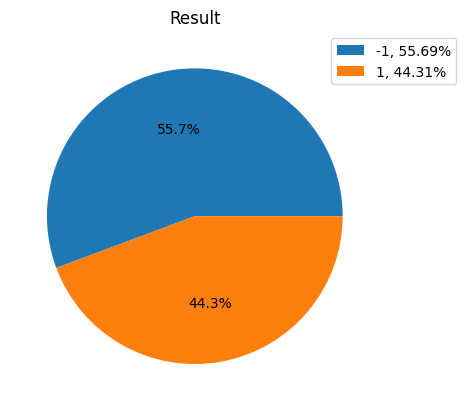

In [35]:
fig, ax = plt.subplots()
plt.title('Result')
ax.pie(df['Result'].value_counts(),
       autopct='%1.1f%%'
      );
labels = [f'{l}, {s*100/df['Result'].value_counts().sum():.2f}%' for l, s in zip(['-1','1'], df['Result'].value_counts())]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels);

In [27]:
#calculando correlação entre os atributos e resultados
corr = df.corr().iloc[:,-1].sort_values()
corr

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URL_Length                     0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IP_Address              0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229
Request_URL                    0.253372


In [49]:
# Pegando as colunas com correlação ao resultado maior que 0,3
colunas_03 = list(corr[corr > 0.3].index[0:-1])
colunas_03

['web_traffic', 'Prefix_Suffix', 'URL_of_Anchor', 'SSLfinal_State']

In [15]:
gb_result = df.groupby(['Result'])

In [28]:
gb_result['SSLfinal_State'].value_counts()

Result  SSLfinal_State
-1      -1                3051
         0                1146
         1                 701
 1       1                5630
        -1                 506
         0                  21
Name: count, dtype: int64

In [29]:
gb_result['URL_of_Anchor'].value_counts()

Result  URL_of_Anchor
-1      -1               3246
         0               1502
         1                150
 1       0               3835
         1               2286
        -1                 36
Name: count, dtype: int64

In [30]:
gb_result['Prefix_Suffix'].value_counts()

Result  Prefix_Suffix
-1      -1               4898
 1      -1               4692
         1               1465
Name: count, dtype: int64

In [31]:
gb_result['web_traffic'].value_counts()

Result  web_traffic
-1       0             1718
        -1             1673
         1             1507
 1       1             4324
        -1              982
         0              851
Name: count, dtype: int64

In [55]:
# definição dos dados preproc
preproc_df = df[[*colunas_03,'Result']]
preproc_df

,web_traffic,Prefix_Suffix,URL_of_Anchor,SSLfinal_State,Result
0,-1,-1,-1,-1,-1
1,0,-1,0,1,-1
2,1,-1,0,-1,-1
3,1,-1,0,-1,-1
4,0,-1,0,1,1
...,...,...,...,...,...
11050,-1,1,1,1,1
11051,1,-1,-1,-1,-1
11052,1,-1,0,-1,-1
11053,1,-1,-1,-1,-1


In [90]:
preproc_df.iloc[:,0:-1]

,web_traffic,Prefix_Suffix,URL_of_Anchor,SSLfinal_State
0,-1,-1,-1,-1
1,0,-1,0,1
2,1,-1,0,-1
3,1,-1,0,-1
4,0,-1,0,1
...,...,...,...,...
11050,-1,1,1,1
11051,1,-1,-1,-1
11052,1,-1,0,-1
11053,1,-1,-1,-1


In [91]:
#Usando o train test split do scikitlearn com stratify para garantir uma proporção similar de phishing e normal
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(
    preproc_df.iloc[:,0:-1],
    preproc_df['Result'],
    test_size = test_size,
    stratify = preproc_df['Result'],
    random_state=19
)

In [92]:
X_train.columns

Index(['web_traffic', 'Prefix_Suffix', 'URL_of_Anchor', 'SSLfinal_State'], dtype='object')

Treinamento e avaliação dos modelos

**Gradient Boosting**

In [93]:
grad_boost = GradientBoostingClassifier(n_estimators=100,
                                        learning_rate=0.1,
                                        max_depth=3,
                                        random_state=0
                                       ).fit(X_train,y_train)

In [94]:
grad_boost_predict = grad_boost.predict(X_test)

In [95]:
grad_boost.score(X_test,y_test)

0.9196816208393632

In [96]:
cm = confusion_matrix(grad_boost_predict,y_test)

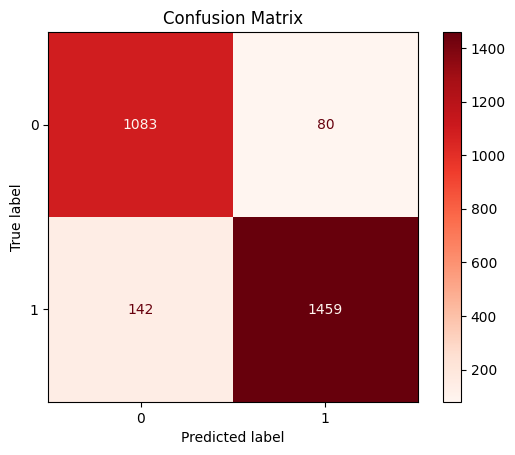

In [97]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm
                             )
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.show()

In [98]:
print(classification_report(y_test,grad_boost_predict))

              precision    recall  f1-score   support

          -1       0.93      0.88      0.91      1225
           1       0.91      0.95      0.93      1539

    accuracy                           0.92      2764
   macro avg       0.92      0.92      0.92      2764
weighted avg       0.92      0.92      0.92      2764



In [100]:
feat_gb = pd.DataFrame(grad_boost.feature_importances_).T
feat_gb.columns = X_test.columns
feat_gb = feat_gb.T.sort_values(0,ascending=False)
print(feat_gb)

                       0
SSLfinal_State  0.770796
URL_of_Anchor   0.154034
web_traffic     0.040647
Prefix_Suffix   0.034523


**Treinando e avlaiando SVM**

In [103]:
svc = SVC().fit(X_train,y_train)

In [104]:
svc_predict = svc.predict(X_test)

In [105]:
svc.score(X_test,y_test)

0.9200434153400868

In [106]:
confusion_matrix(svc_predict,y_test)

array([[1089,   85],
       [ 136, 1454]])

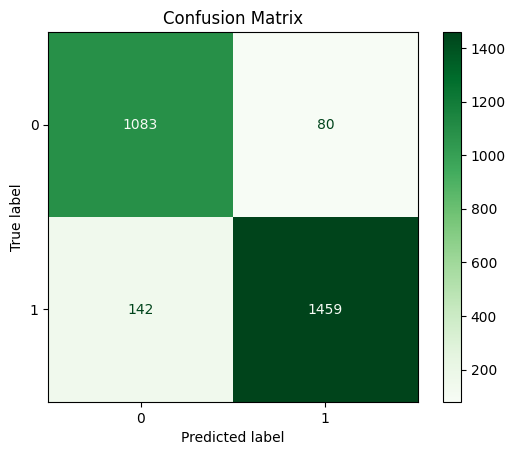

In [108]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm
                             )
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.show()

In [107]:
print(classification_report(y_test,svc_predict))

              precision    recall  f1-score   support

          -1       0.93      0.89      0.91      1225
           1       0.91      0.94      0.93      1539

    accuracy                           0.92      2764
   macro avg       0.92      0.92      0.92      2764
weighted avg       0.92      0.92      0.92      2764



**Treinando, rodando e avaliando Random Forest**

In [119]:
rand_for = RandomForestClassifier(max_depth=3,
                                  n_estimators=1000,
                                  random_state=0)

In [120]:
rand_for.fit(X_train,y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [121]:
rand_for_pred = rand_for.predict(X_test)

In [122]:
rand_for_sc = rand_for.score(X_test,y_test)
print(rand_for_sc)

0.9149782923299565


In [123]:
confusion_matrix(rand_for_pred,y_test)

array([[1096,  106],
       [ 129, 1433]])

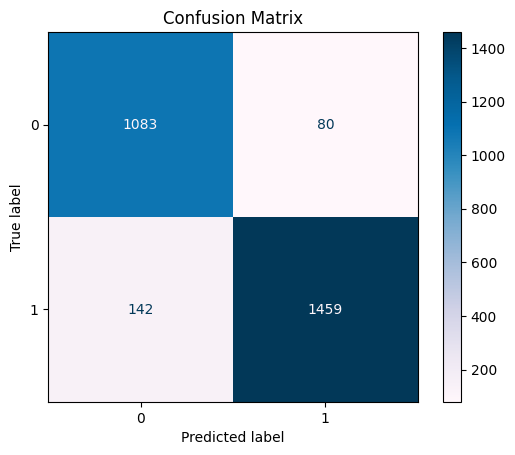

In [124]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm
                             )
disp.plot(cmap=plt.cm.PuBu)
plt.title('Confusion Matrix')
plt.show()

In [125]:
print(classification_report(y_test,rand_for_pred))

              precision    recall  f1-score   support

          -1       0.91      0.89      0.90      1225
           1       0.92      0.93      0.92      1539

    accuracy                           0.91      2764
   macro avg       0.91      0.91      0.91      2764
weighted avg       0.91      0.91      0.91      2764



In [127]:
feat_gb = pd.DataFrame(rand_for.feature_importances_).T
feat_gb.columns = X_test.columns
feat_gb = feat_gb.T.sort_values(0,ascending=False)
print(feat_gb)

                       0
SSLfinal_State  0.570659
URL_of_Anchor   0.342928
web_traffic     0.053839
Prefix_Suffix   0.032574
